<a href="https://colab.research.google.com/github/urvashiramdasani/ML-DL-Python/blob/master/Animal_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
!git clone 'https://github.com/dphi-official/Datasets/'

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [ ]:
# To unzip train_beg.zip
!unzip /content/Datasets/animal_data/train_beg.zip 

# To unzip test_beg.zip
!unzip /content/Datasets/animal_data/test_beg.zip

In [ ]:
import pandas as pd

# Loading training csv file
train_labels = pd.read_csv("/content/Datasets/animal_data/Training_set_animals.csv")
train_labels.head()

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


In [ ]:
image_paths = [[fname, '/content/train_beg/' + fname[:-4] + '.jpg'] for fname in train_labels['filename']]
image_paths

[['Image_1.jpg', '/content/train_beg/Image_1.jpg'],
 ['Image_2.jpg', '/content/train_beg/Image_2.jpg'],
 ['Image_3.jpg', '/content/train_beg/Image_3.jpg'],
 ['Image_4.jpg', '/content/train_beg/Image_4.jpg'],
 ['Image_5.jpg', '/content/train_beg/Image_5.jpg'],
 ['Image_6.jpg', '/content/train_beg/Image_6.jpg'],
 ['Image_7.jpg', '/content/train_beg/Image_7.jpg'],
 ['Image_8.jpg', '/content/train_beg/Image_8.jpg'],
 ['Image_9.jpg', '/content/train_beg/Image_9.jpg'],
 ['Image_10.jpg', '/content/train_beg/Image_10.jpg'],
 ['Image_11.jpg', '/content/train_beg/Image_11.jpg'],
 ['Image_12.jpg', '/content/train_beg/Image_12.jpg'],
 ['Image_13.jpg', '/content/train_beg/Image_13.jpg'],
 ['Image_14.jpg', '/content/train_beg/Image_14.jpg'],
 ['Image_15.jpg', '/content/train_beg/Image_15.jpg'],
 ['Image_16.jpg', '/content/train_beg/Image_16.jpg'],
 ['Image_17.jpg', '/content/train_beg/Image_17.jpg'],
 ['Image_18.jpg', '/content/train_beg/Image_18.jpg'],
 ['Image_19.jpg', '/content/train_beg/Image_19

In [ ]:
if len(train_labels) == len(image_paths):
  print('Number of train_labels i.e, ', len(train_labels), ' is same as number of image_paths i.e, ', len(image_paths))
else:
  print('Some error')

Number of train_labels i.e,  1200  is same as number of image_paths i.e,  1200


In [ ]:
images = pd.DataFrame(image_paths)
images.columns = ['filename', 'file']
images

,filename,file
0,Image_1.jpg,/content/train_beg/Image_1.jpg
1,Image_2.jpg,/content/train_beg/Image_2.jpg
2,Image_3.jpg,/content/train_beg/Image_3.jpg
3,Image_4.jpg,/content/train_beg/Image_4.jpg
4,Image_5.jpg,/content/train_beg/Image_5.jpg
...,...,...
1195,Image_1196.jpg,/content/train_beg/Image_1196.jpg
1196,Image_1197.jpg,/content/train_beg/Image_1197.jpg
1197,Image_1198.jpg,/content/train_beg/Image_1198.jpg
1198,Image_1199.jpg,/content/train_beg/Image_1199.jpg


In [ ]:
X_train = pd.merge(images, train_labels, how = 'inner', on = 'filename')
X_train

,filename,file,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,mucca
1,Image_2.jpg,/content/train_beg/Image_2.jpg,mucca
2,Image_3.jpg,/content/train_beg/Image_3.jpg,mucca
3,Image_4.jpg,/content/train_beg/Image_4.jpg,mucca
4,Image_5.jpg,/content/train_beg/Image_5.jpg,mucca
...,...,...,...
1195,Image_1196.jpg,/content/train_beg/Image_1196.jpg,pecora
1196,Image_1197.jpg,/content/train_beg/Image_1197.jpg,pecora
1197,Image_1198.jpg,/content/train_beg/Image_1198.jpg,pecora
1198,Image_1199.jpg,/content/train_beg/Image_1199.jpg,pecora


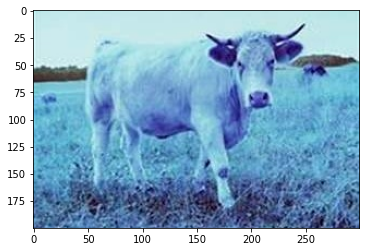

In [ ]:
img = cv2.imread(X_train['file'][4]) # Reading the 4th image
plt.imshow(img)
plt.show()

In [ ]:
print(X_train['animal_type'][4])

mucca


In [ ]:
data = []
labels = []
for i in range(len(X_train)):
  image_arr = cv2.imread(X_train['file'][i])
  data.append(image_arr)
  if X_train['animal_type'][i] == 'mucca':         
    labels.append(0)
  else:               
    labels.append(1)

In [ ]:
data = np.array(data)
labels = np.array(labels)

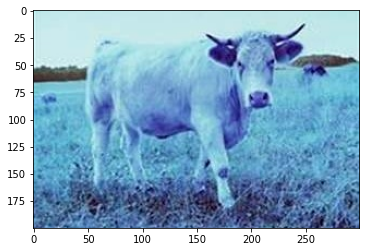

In [ ]:
plt.imshow(data[4]) # 4th image
plt.show()

In [ ]:
print(labels[4])

0


In [ ]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(data, labels, random_state = 42, test_size = 0.2)

In [ ]:
x_resize = []
for img in x_train:
  resize_img = cv2.resize(img, (28, 28))
  x_resize.append(resize_img)
x_resize = np.array(x_resize)
x_resize.shape

(960, 28, 28, 3)

In [ ]:
# Data Augmentation - To get variety of a single image. Here I have randomly changed the height, width, 
# rotation, zoom and flipping because an animal can be seen as from different angles and distance.
# Hence our AI should be able to make predictions for them as well.
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
        tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

In [ ]:
# Define the model
model = Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
# model.add(Flatten(input_shape = (28, 28, 3)))
model.add(tf.keras.layers.Dense(512 , input_shape = (28, 28, 3), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.build(x_resize.shape)
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_10 (Sequential)   (None, None, None, 3)     0         
_________________________________________________________________
rescaling_12 (Rescaling)     (960, None, None, 3)      0         
_________________________________________________________________
dense_24 (Dense)             (960, None, None, 512)    2048      
_________________________________________________________________
dropout_11 (Dropout)         (960, None, None, 512)    0         
_________________________________________________________________
dense_25 (Dense)             (960, None, None, 2)      1026      
Total params: 3,074
Trainable params: 3,074
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(x_resize, y_train)

InvalidArgumentError: ignored